## Nutrition Health Survey - Age Prediction 
### Summer Analytics 2025, IIT Guwahati x AI Planet - Week 4 Hackathon

In [197]:
# let us first start by importing all the necessary libraries.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# We then load the Train and Test datasets.

In [150]:
train_data = pd.read_csv("Train_Data.csv")
train_data

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [236]:
test_data = pd.read_csv("Test_Data.csv")
test_data

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...
307,74150.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [7]:
# let us find the null values in Train data, and perform simple mean imputation for now.

In [152]:
train_data.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [9]:
# Let's drop all the NaNs in our target variable 'age_group' first.

In [153]:
train_data = train_data.dropna(subset=['age_group'])

In [11]:
# We have to map Adult - 0 and Senior - 1, i.e, text labels to numeric values.

In [154]:
train_data.loc[:,'age_group'] = train_data['age_group'].map({'Adult':0,'Senior':1})

In [155]:
# Remember - we can only perform mean imputation for numeric columns.
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
# numeric_cols = numeric_cols.drop('age_group')  # we exclude target variable

for col in numeric_cols:
    if train_data[col].isnull().sum() > 0:
        train_data.loc[:,col] = train_data[col].fillna(train_data[col].mean())


# print(train_data.isnull().sum())

In [269]:
# Let us now move on to the fun part - feature engineering!

In [157]:
# Let us try log transformations

In [194]:
train_data['log_LBXGLT'] = np.log1p(train_data['LBXGLT'])  # log(1 + x)
train_data['log_LBXIN'] = np.log1p(train_data['LBXIN'])
# train_data.loc[:,'GLU_DIAB_INTERACT'] = train_data['LBXGLU'] * train_data['DIQ010']
# train_data['log_GLU_DIAB_INTERACT'] = np.log1p(train_data['GLU_DIAB_INTERACT'])

In [71]:
# Let us try polynomial transformations

In [195]:
train_data['LBXGLT_squared'] = train_data['LBXGLT'] ** 2
train_data['LBXIN_squared'] = train_data['LBXIN'] ** 2
# train_data['GLU_DIAB_INTERACT_squared'] = train_data['GLU_DIAB_INTERACT'] ** 2

In [73]:
# Let us try ratio features

In [200]:
# def categorize_bmi(bmi):
#     if bmi < 18.5:    # 'underweight' category
#         return 0
#     elif bmi < 25:    # 'normal' category
#         return 1
#     elif bmi < 30:    # 'overweight' category
#         return 2
#     else:             # 'obese' category
#         return 3

# train_data.loc[:,'BMI_Category'] = train_data['BMXBMI'].apply(categorize_bmi)

In [201]:
train_data['glucose_insulin_ratio'] = train_data['LBXGLT'] / (train_data['LBXIN'] + 1e-5)
# train_data.loc[:,'is_active'] = (train_data['PAQ605'] == 1).astype(int)
# train_data['glucose_activity_interaction'] = train_data['LBXGLT'] * train_data['is_active']
# train_data['insulin_activity_interaction'] = train_data['LBXIN'] * train_data['is_active']
# train_data['glucose_bmi_interaction'] = train_data['LBXGLT'] * train_data['BMI_Category']

In [202]:
# we drop low-importance features
cols_to_drop = [
    'BMXBMI', 'LBXGLU', 'DIQ010', 'PAQ605', 'RIAGENDR', 'BMI_Category', 'is_active',
    'glucose_activity_interaction', 'insulin_activity_interaction', 'glucose_bmi_interaction',
    'GLU_DIAB_INTERACT_squared']

train_data = train_data.drop(columns=cols_to_drop, errors='ignore')

In [270]:
# Let us try categorizing BMI into 'underweight', 'normal', 'overweight' and 'obsese' categories

In [30]:
# def categorize_bmi(bmi):
#     if bmi < 18.5:    # 'underweight' category
#         return 0
#     elif bmi < 25:    # 'normal' category
#         return 1
#     elif bmi < 30:    # 'overweight' category
#         return 2
#     else:             # 'obese' category
#         return 3

# train_data.loc[:,'BMI_Category'] = train_data['BMXBMI'].apply(categorize_bmi)

In [31]:
# Let us see the correlation between glucose and diabetes

In [32]:
# train_data.loc[:,'GLU_DIAB_INTERACT'] = train_data['LBXGLU'] * train_data['DIQ010']

In [33]:
# let us also see the acitvity levels

In [34]:
# train_data.loc[:,'is_active'] = (train_data['PAQ605'] == 1).astype(int)

In [ ]:
# Remove the raw features

In [135]:
# train_data = train_data.drop(columns=['BMXBMI', 'LBXGLU', 'DIQ010', 'PAQ605','RIAGENDR', 'BMI_Category', 'is_active', 
#              'glucose_activity_interaction', 'insulin_activity_interaction','glucose_bmi_interaction','GLU_DIAB_INTERACT_squared'],errors='ignore')

In [203]:
# Drop rows where age_group is NaN
train_data = train_data.dropna(subset=['age_group'])

In [204]:
print(train_data.columns)

Index(['SEQN', 'LBXGLT', 'LBXIN', 'age_group', 'log_LBXGLT', 'log_LBXIN',
       'GLU_DIAB_INTERACT', 'log_GLU_DIAB_INTERACT', 'LBXGLT_squared',
       'LBXIN_squared', 'glucose_insulin_ratio'],
      dtype='object')


In [138]:
# Drop 'SEQN' - as it is just an identifier. 

In [205]:
X = train_data.drop(columns=['SEQN', 'age_group'])
y = train_data['age_group'].astype(int)      # this is our target feature!

In [206]:
print(X.isnull().sum())

LBXGLT                   0
LBXIN                    0
log_LBXGLT               0
log_LBXIN                0
GLU_DIAB_INTERACT        0
log_GLU_DIAB_INTERACT    0
LBXGLT_squared           0
LBXIN_squared            0
glucose_insulin_ratio    0
dtype: int64


In [207]:
print(y.isnull().sum())

0


In [23]:
# let us split and train the model.

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [245]:
# let us try feature scaling. Hmm, Doesn't seem to affect the score much. So let's just not do it.

In [246]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [209]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

In [254]:
# let's use a simple logistic regression model.
# from sklearn.linear_model import LogisticRegression

In [249]:
# lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
# lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# what if we drop NaNs again before prediction? (ps. would not need to do this when we are doing feature scaling.)

In [255]:
# X_val_clean = X_val.dropna()
# y_val_clean = y_val.loc[X_val_clean.index]

In [256]:
# predict

In [257]:
# from sklearn.metrics import f1_score
# y_pred_lr = lr_model.predict(X_val_clean)
# lr_score = f1_score(y_val_clean, y_pred)
# lr_score

C:\Users\Chaaitra001\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.3508771929824561

In [ ]:
# That doesn't look too good. let's try a different model - Random Forest Classifier

In [210]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

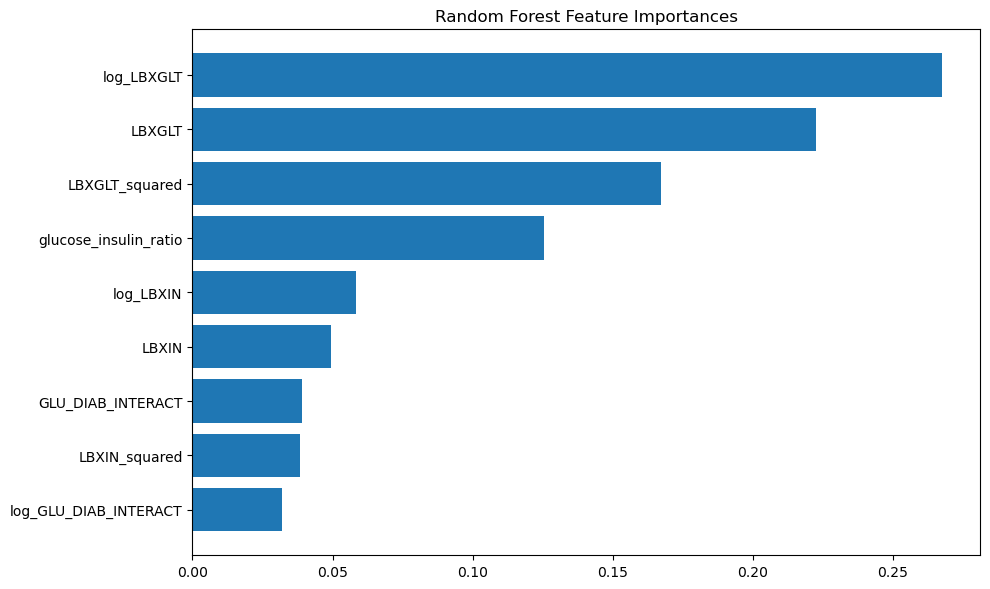

In [211]:
feature_names = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.tight_layout()
plt.show()

In [286]:
# what if we drop NaNs again before prediction?

In [212]:
X_val_clean = X_val.dropna()
y_val_clean = y_val.loc[X_val_clean.index]

In [213]:
# predict

In [214]:
y_pred_rf = rf_model.predict(X_val_clean)
rf_score = f1_score(y_val_clean, y_pred_rf)
rf_score

0.32222222222222224

In [ ]:
# Let us now try Gradient Boosting. hmm, somehow this is worse. We conclude Random Forest as our best model.

In [262]:
# # Let us also include Gradient boosting!
# from sklearn.ensemble import GradientBoostingClassifier
# gb_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
# gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [264]:
# y_pred_gb = gb_model.predict(X_val)
# gb_score = f1_score(y_val, y_pred_gb)
# gb_score

0.2535211267605634

In [220]:
print(test_data.columns.tolist())

['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'GLU_DIAB_INTERACT', 'log_LBXGLT', 'log_LBXIN', 'LBXGLT_squared', 'LBXIN_squared', 'glucose_insulin_ratio', 'glucose_activity_interaction', 'insulin_activity_interaction', 'glucose_bmi_interaction']


In [221]:
print(test_data.head())

   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  GLU_DIAB_INTERACT  \
0       1.0     1.0    32.2    96.0     2.0   135.0  15.11              192.0   
1       2.0     2.0    26.3   100.0     2.0   141.0  15.26              200.0   
2       1.0     2.0    28.6   107.0     2.0   136.0   8.82              214.0   
3       2.0     1.0    22.1    93.0     2.0   111.0  12.13              186.0   
4       1.0     1.0    24.7    91.0     2.0   105.0   3.12              182.0   

   log_LBXGLT  log_LBXIN  LBXGLT_squared  LBXIN_squared  \
0    4.912655   2.779440         18225.0       228.3121   
1    4.955827   2.788708         19881.0       232.8676   
2    4.919981   2.284421         18496.0        77.7924   
3    4.718499   2.574900         12321.0       147.1369   
4    4.663439   1.415853         11025.0         9.7344   

   glucose_insulin_ratio  glucose_activity_interaction  \
0               6.353408                          96.0   
1               6.553080                  

In [226]:
# Let us now move on to the Test data. We save 'SEQN' under test_ids for submission.
test_ids = test_data['SEQN'].copy()  
# X_test = test_data.drop(columns=['SEQN'])  # use this for prediction

# test_data = test_data.drop(columns=['SEQN', 'BMXBMI', 'LBXGLU', 'DIQ010', 'PAQ605', 'RIAGENDR'])

In [238]:
# Similar to how we handled missing values in Train data, we perform simple mean imputation in Test data as well.
for col in test_data.columns:
    if col in train_data.columns: 
        if test_data[col].isnull().sum() > 0:
            test_data[col].fillna(train_data[col].mean(), inplace=True)

C:\Users\Chaaitra001\AppData\Local\Temp\ipykernel_21908\3373813926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(train_data[col].mean(), inplace=True)


In [ ]:
# feature engineering!

In [239]:
test_data['log_LBXGLT'] = np.log(test_data['LBXGLT'] + 1)
test_data['log_LBXIN'] = np.log(test_data['LBXIN'] + 1)
test_data['LBXGLT_squared'] = test_data['LBXGLT'] ** 2
test_data['LBXIN_squared'] = test_data['LBXIN'] ** 2

test_data['glucose_insulin_ratio'] = test_data['LBXGLT'] / (test_data['LBXIN'] + 1e-6)
test_data['glucose_activity_interaction'] = test_data['LBXGLT'] * test_data['PAQ605']
test_data['insulin_activity_interaction'] = test_data['LBXIN'] * test_data['PAQ605']
test_data['glucose_bmi_interaction'] = test_data['LBXGLT'] * test_data['BMXBMI']

test_data['GLU_DIAB_INTERACT'] = test_data['LBXGLT'] * test_data['DIQ010']
test_data['log_GLU_DIAB_INTERACT'] = np.log(test_data['GLU_DIAB_INTERACT'] + 1)

In [240]:
print(set(X_train.columns) - set(test_data.columns))

set()


In [ ]:
# Drop columns

In [241]:
drop_cols = ['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010']
X_test = test_data.drop(columns=drop_cols)

In [242]:
X_test = X_test[X_train.columns]

In [186]:
# Finally, predict and save our submission as result.csv file!

In [243]:
test_pred = rf_model.predict(X_test)

In [252]:
import os

# Ensure filename ends in .csv
filename = 'result.csv'
if not filename.endswith('.csv'):
    filename += '.csv'

submission.to_csv(filename, index=False)

In [253]:
submission = pd.DataFrame({'age_group': test_pred})
submission.to_csv("result.csv", index=False)

In [254]:
print(submission.head())

   age_group
0          0
1          1
2          1
3          0
4          1
